In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import re
# import math
import numpy as np

# Movie analysis

## Cleansing the data

In [3]:
movie_df = pd.read_csv('../data/imdb_superhero.csv')
movie_df

,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,Budget,...,Producer1,Producer2,Producer3,Producer4,Producer5,Company1,Company2,Company3,Company4,Company5
0,6320628,Spider-Man: Far from Home,129.0,7.7,200908.0,PG-13,2019,6,26,160000000.0,...,Victoria Alonso,Avi Arad,Chris Buongiorno,Eric Hauserman Carroll,Louis D'Esposito,Columbia Pictures,Pascal Pictures,Marvel Studios,NaN,NaN
1,4154796,Avengers: Endgame,181.0,8.6,569782.0,PG-13,2019,4,22,356000000.0,...,Victoria Alonso,Mitchell Bell,Ari Costa,Louis D'Esposito,Jon Favreau,Marvel Studios,NaN,NaN,NaN,NaN
2,6565702,Dark Phoenix,113.0,5.8,96585.0,PG-13,2019,6,5,200000000.0,...,Daniel Auclair,Todd Hallowell,Justin Haut,Simon Kinberg,Stan Lee,Twentieth Century Fox,Bad Hat Harry Productions,Donners' Company,Kinberg Genre,Marvel Entertainment
3,468569,The Dark Knight,152.0,9.0,2105721.0,TV-14::(LV),2008,7,14,185000000.0,...,Kevin De La Noy,Jordan Goldberg,Philip Lee,Benjamin Melniker,Christopher Nolan,Warner Bros.,Legendary Entertainment,Syncopy,DC Comics,NaN
4,1477834,Aquaman,143.0,7.0,300580.0,PG-13,2018,11,26,160000000.0,...,Khadija Alami,Jon Berg,Rob Cowan,Walter Hamada,Geoff Johns,DC Comics,DC Entertainment,Panoramic Pictures,Rodeo FX,The Safran Company
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,1396235,Catalina: A New Kind of Superhero,98.0,3.0,14.0,Not Rated,2009,1,5,1700.0,...,Kenneth D. Barker,NaN,NaN,NaN,NaN,Water on the Rock,NaN,NaN,NaN,NaN
480,2597794,ACT Honour Walk,50.0,NaN,NaN,NaN,2013,1,1,NaN,...,Wendell Charles NeSmith,NaN,NaN,NaN,NaN,Open Source University,NaN,NaN,NaN,NaN
481,4306404,Oigye Eseo on Ulemae 9: Mujeok Ui Paiteo Ulemae,NaN,NaN,NaN,NaN,1993,10,6,NaN,...,Cheong-gi Kim,NaN,NaN,NaN,NaN,Seoul Donghwa,NaN,NaN,NaN,NaN
482,5737002,Translyatsia Safronova: Pro Konstruktory,65.0,1.2,12.0,NaN,2015,8,19,NaN,...,Andrey Boyko,Konstantin Safronov,NaN,NaN,NaN,Obzory igrushek Tovarisch Safronov,Obzor konstruktora,NaN,NaN,NaN


In [4]:
rating_map = {
    "MPAARating": [],
    "SimpleRating": []
}

for rating in movie_df['MPAARating'].unique():
    rating_map["MPAARating"].append(rating)
    try:
        rating_map["SimpleRating"].append(rating.split(":")[0])
    except AttributeError:
        rating_map["SimpleRating"].append("Unrated")

ratemap_df = pd.DataFrame(rating_map)
# ratemap_df

In [5]:
# movie_df.info()

In [6]:
movie_df = pd.merge(left=movie_df, right=ratemap_df, how="left", on='MPAARating')
movie_df

,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,Budget,...,Producer2,Producer3,Producer4,Producer5,Company1,Company2,Company3,Company4,Company5,SimpleRating
0,6320628,Spider-Man: Far from Home,129.0,7.7,200908.0,PG-13,2019,6,26,160000000.0,...,Avi Arad,Chris Buongiorno,Eric Hauserman Carroll,Louis D'Esposito,Columbia Pictures,Pascal Pictures,Marvel Studios,NaN,NaN,PG-13
1,4154796,Avengers: Endgame,181.0,8.6,569782.0,PG-13,2019,4,22,356000000.0,...,Mitchell Bell,Ari Costa,Louis D'Esposito,Jon Favreau,Marvel Studios,NaN,NaN,NaN,NaN,PG-13
2,6565702,Dark Phoenix,113.0,5.8,96585.0,PG-13,2019,6,5,200000000.0,...,Todd Hallowell,Justin Haut,Simon Kinberg,Stan Lee,Twentieth Century Fox,Bad Hat Harry Productions,Donners' Company,Kinberg Genre,Marvel Entertainment,PG-13
3,468569,The Dark Knight,152.0,9.0,2105721.0,TV-14::(LV),2008,7,14,185000000.0,...,Jordan Goldberg,Philip Lee,Benjamin Melniker,Christopher Nolan,Warner Bros.,Legendary Entertainment,Syncopy,DC Comics,NaN,TV-14
4,1477834,Aquaman,143.0,7.0,300580.0,PG-13,2018,11,26,160000000.0,...,Jon Berg,Rob Cowan,Walter Hamada,Geoff Johns,DC Comics,DC Entertainment,Panoramic Pictures,Rodeo FX,The Safran Company,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,1396235,Catalina: A New Kind of Superhero,98.0,3.0,14.0,Not Rated,2009,1,5,1700.0,...,NaN,NaN,NaN,NaN,Water on the Rock,NaN,NaN,NaN,NaN,Not Rated
480,2597794,ACT Honour Walk,50.0,NaN,NaN,NaN,2013,1,1,NaN,...,NaN,NaN,NaN,NaN,Open Source University,NaN,NaN,NaN,NaN,Unrated
481,4306404,Oigye Eseo on Ulemae 9: Mujeok Ui Paiteo Ulemae,NaN,NaN,NaN,NaN,1993,10,6,NaN,...,NaN,NaN,NaN,NaN,Seoul Donghwa,NaN,NaN,NaN,NaN,Unrated
482,5737002,Translyatsia Safronova: Pro Konstruktory,65.0,1.2,12.0,NaN,2015,8,19,NaN,...,Konstantin Safronov,NaN,NaN,NaN,Obzory igrushek Tovarisch Safronov,Obzor konstruktora,NaN,NaN,NaN,Unrated


## Exploring the data

In [7]:
# joined.SimpleRating.unique()

In [8]:
# movie_df.sort_values(by='Votes', ascending=False)

## Visualizing the data

In [18]:
movie_df["Budg_Transf"] = np.log10(movie_df['Budget'])
# sns.histplot(movie_df)

In [10]:
movie_df.columns

Index(['ID', 'Title', 'Runtime', 'Rating', 'Votes', 'MPAARating',
       'ReleaseYear', 'ReleaseMonth', 'ReleaseDay', 'Budget', 'OpeningWeekend',
       'GrossSales', 'Genres', 'Cast1', 'Cast2', 'Cast3', 'Cast4', 'Cast5',
       'Cast6', 'Cast7', 'Cast8', 'Cast9', 'Cast10', 'Director1', 'Director2',
       'Director3', 'Director4', 'Director5', 'Producer1', 'Producer2',
       'Producer3', 'Producer4', 'Producer5', 'Company1', 'Company2',
       'Company3', 'Company4', 'Company5', 'SimpleRating', 'Budg_Transf'],
      dtype='object')

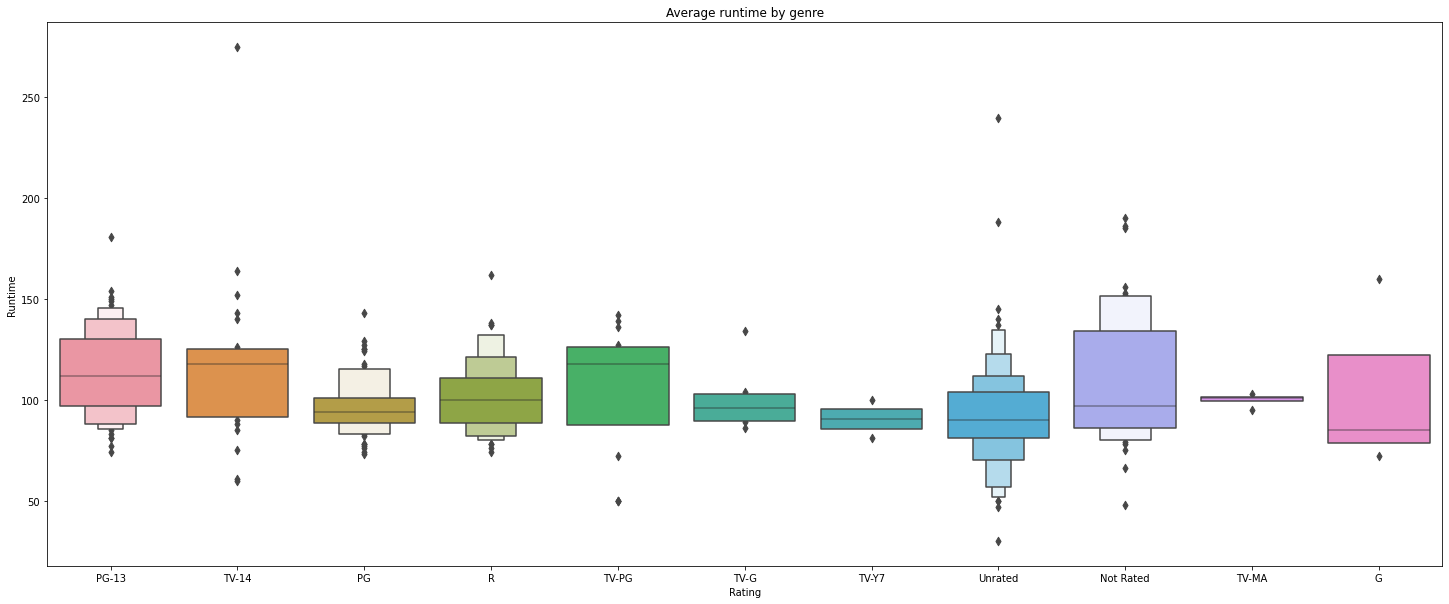

In [11]:
plt.figure(figsize=(25,10))

sns.boxenplot(data=movie_df, x="SimpleRating", y="Runtime")

plt.title('Average runtime by genre')
plt.xlabel('Rating')
plt.ylabel('Runtime')

plt.show()

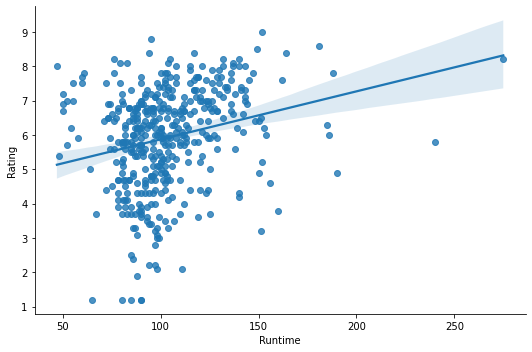

In [12]:
# sns.set(rc={"figure.figsize":(15, 8)}) #width=8, height=4

sns.lmplot(x="Runtime", y="Rating", data=movie_df, height=5, aspect=1.5)

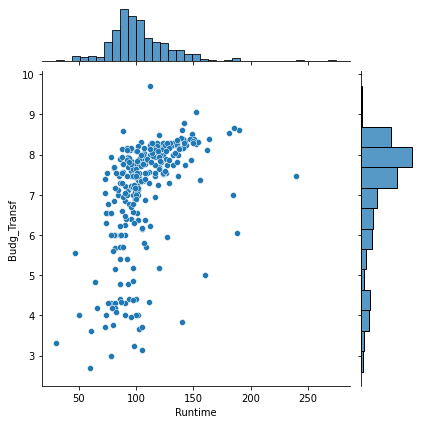

In [19]:
sns.jointplot(data=movie_df, x="Runtime", y="Budg_Transf")

<AxesSubplot:>

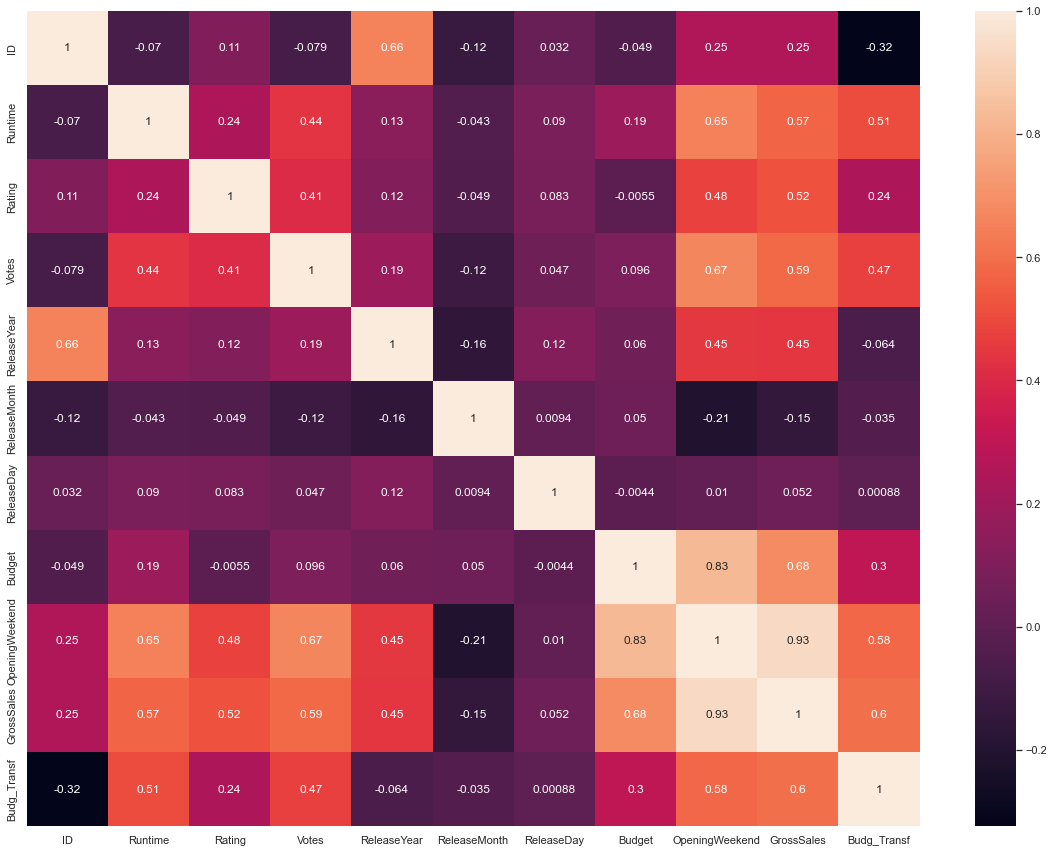

In [23]:
sns.set(rc={"figure.figsize":(20, 15)})

sns.heatmap(movie_df.corr(), annot=True)

In [ ]:
# plt.figure(figsize=(25,10))

# sns.scatterplot(data=movie_df, x="Runtime", y="Rating")

# plt.title('Average runtime by genre')
# plt.xlabel('Runtime')
# plt.ylabel('Rating')

# plt.show()

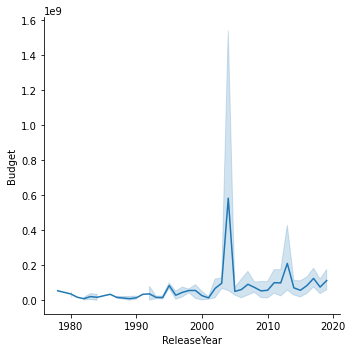

In [ ]:
sns.relplot(x="ReleaseYear", y="Budget", kind="line", data=movie_df)

<Figure size 1800x1800 with 0 Axes>

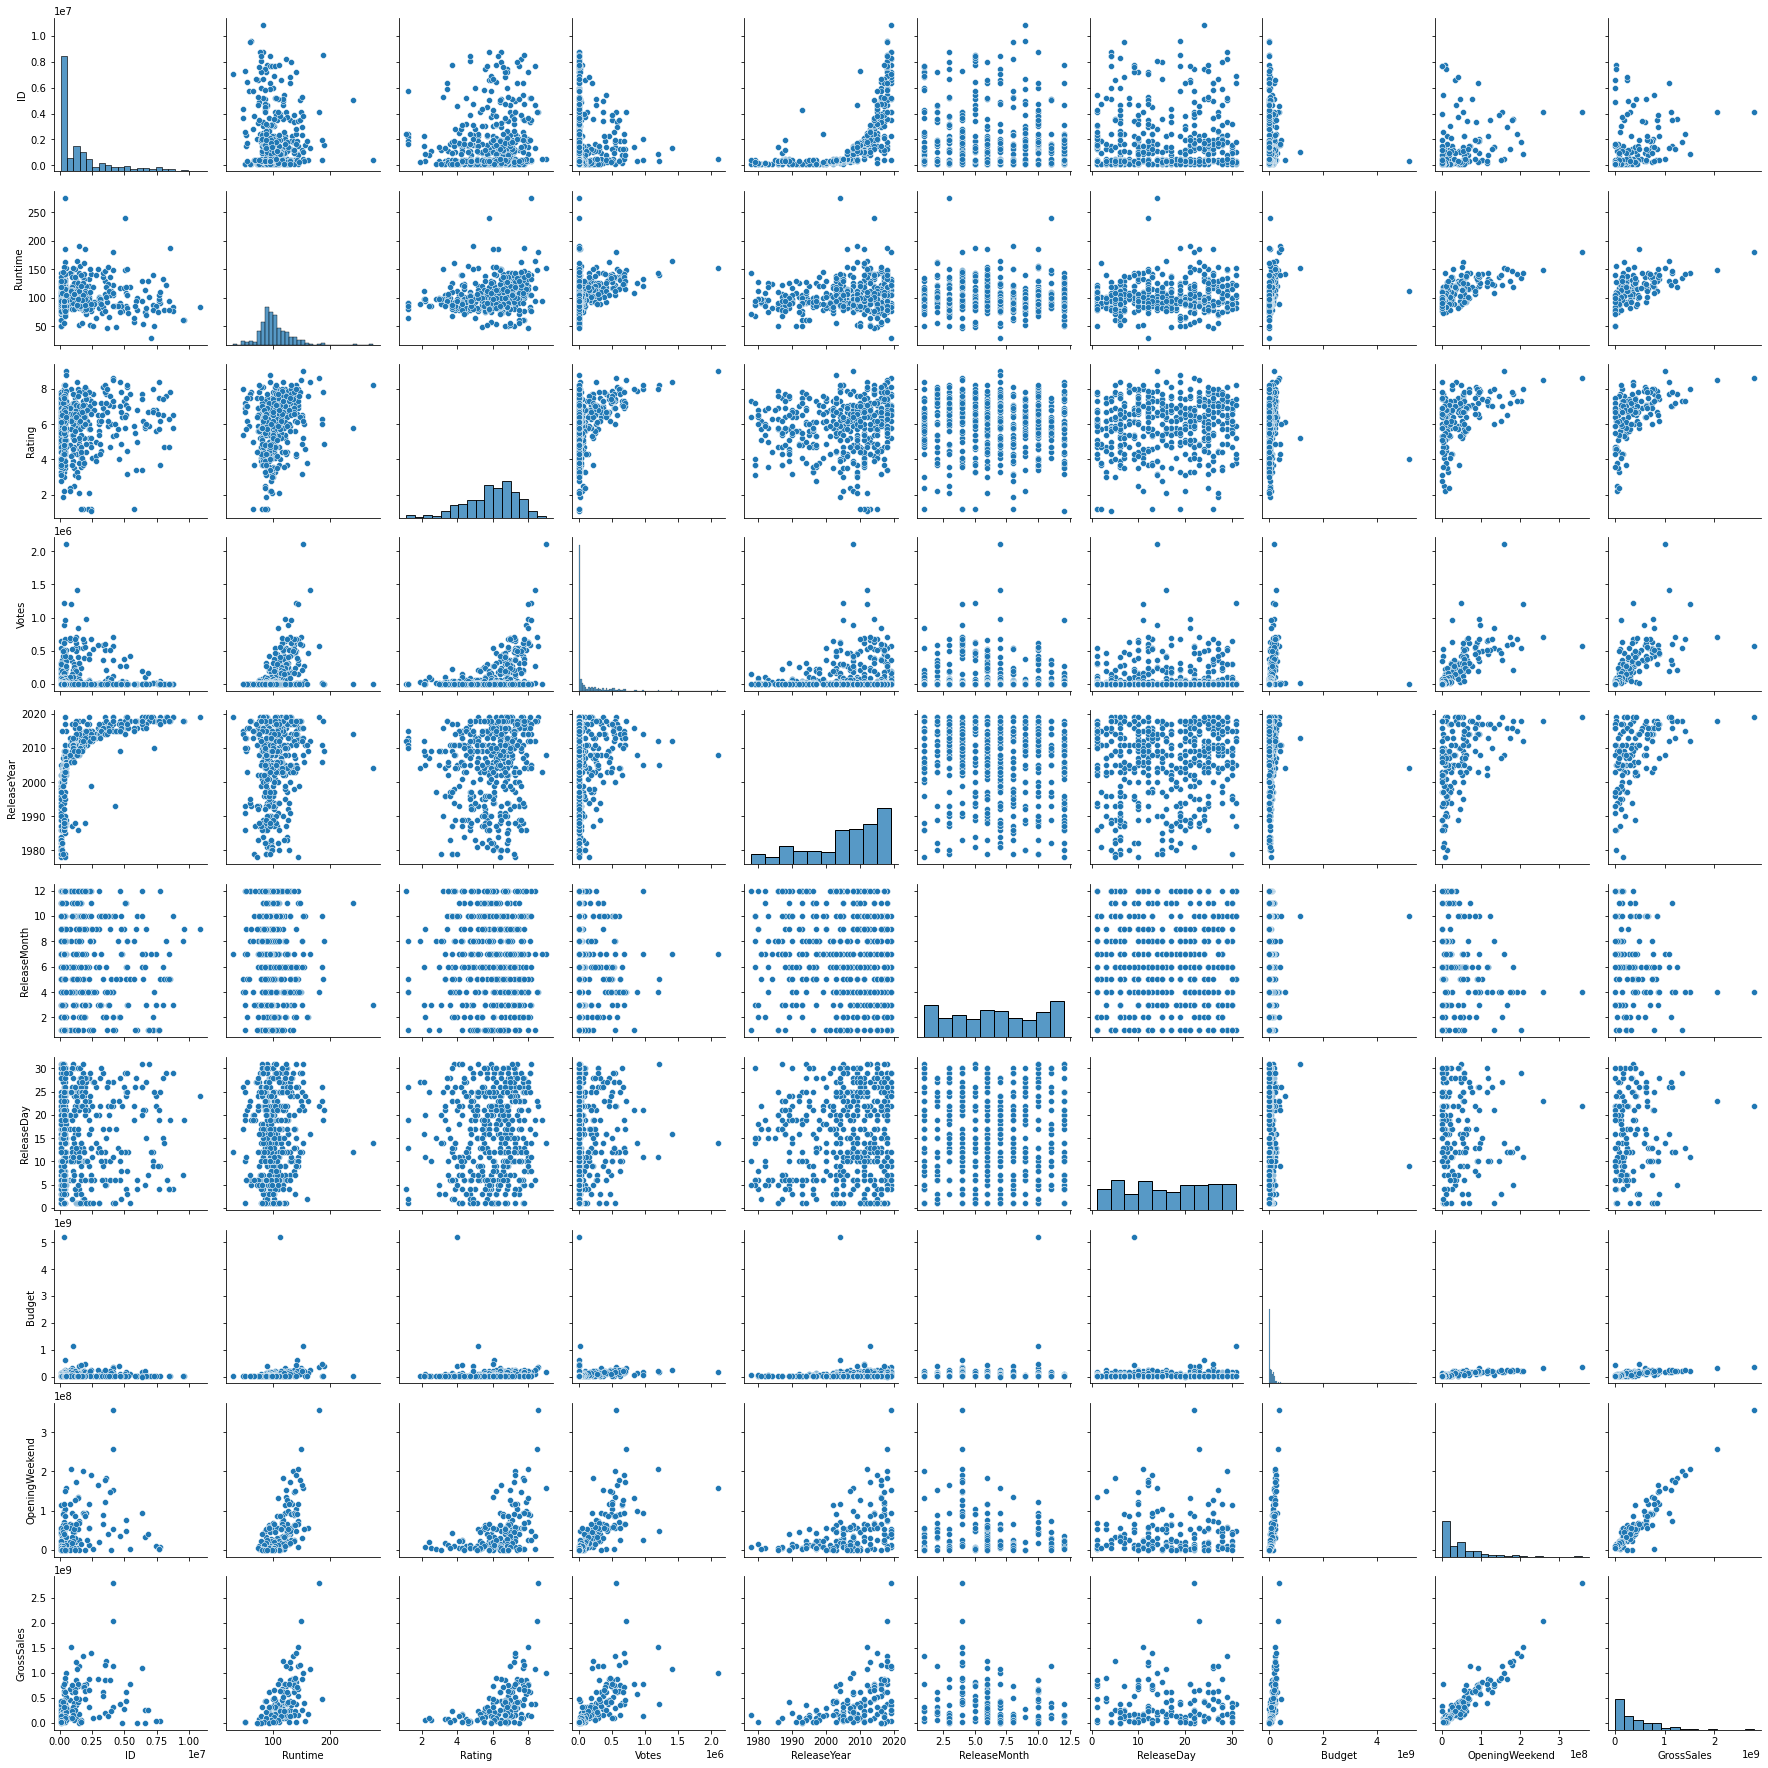

In [ ]:
plt.figure(figsize=(25,25))

sns.pairplot(movie_df)

plt.show()

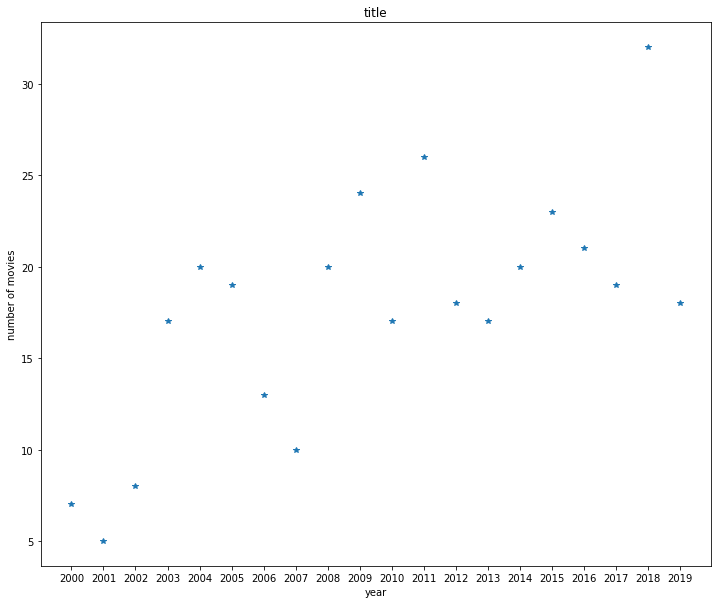

In [ ]:
plt.figure(figsize=(12,10))
plt.title('title')
plt.xlabel('year')
plt.ylabel('number of movies')

df = movie_df["ReleaseYear"].groupby(movie_df.ReleaseYear).agg('count').loc[2000:]
plt.xticks(df.keys().to_list())

plt.plot(df, '*')
plt.show()